## Dennison (Crime)

#### Introduction 
For this submetric, I'm going to focus on crime/overall safety of each neighborhood. While some alternatives were explored such as the Jail census or the number of arrests, I eventually settled on the "Blotter Data", or number of crime reports in each neighborhood. While this submetric may seem boring and unoriginal, when determining the quality of a neighborhood, crime is such an important factor that it can't be ignored. 

#### The Metric 
The metric I’m using is the number of observations of crime in each neighborhood. It will be measured using the blotter dataset from the WPRDC, and it contains crime reports in each neighborhood since 1/1/2016. I’m going to keep track of the observations of crime in each neighborhood and compare the frequencies; the neighborhood with the fewest number of observations will be deemed the safest. Once I had the data in this format, I converted it into a map using geopandas and the shapefile on the WPRDC website. Then, I made some customizations to the map which would best fit the purpose. 

#### The Best Neighborhood 
According to this crime metric only, the best neighborhood in Pittsburgh would be Mt. Oliver Boro, with only 86 reported crimes since 2016, which is the lowest observation count. It is the best neighborhood from a pure safety standpoint as crime is very infrequent. On the other hand, the neighborhood with the most crime observations would be the South Side Flats, with 15843 crimes since 2016; definitely way more dangerous than the previous.

#### Conclusion 
The data driven determination of the “best neighborhood” is different from my personal favorite neighborhood in the Greater Pittsburgh Area, as it only takes into consideration the crime count. While crime is still considered, in contrast, my personal favorite neighborhood takes other factors into account such as location/convenience, traffic, and sanitation. However, Mt. Oliver Boro is still a solid choice, and the data driven result is still optimal.

In [1]:
import pandas as pd #importing pandas

%matplotlib inline

In [2]:
data = pd.read_csv("Blotter.csv")
data.head(5)
#data.pivot(columns="INCIDENTNEIGHBORHOOD", values="INCIDENTHIERARCHYDESC").head(10)

data = data.drop(columns=['PK','CCR','HIERARCHY','CLEAREDFLAG','INCIDENTTRACT','COUNCIL_DISTRICT','PUBLIC_WORKS_DIVISION','OFFENSES','INCIDENTZONE'])
data = data.rename(columns={'INCIDENTNEIGHBORHOOD':'Neighborhood','INCIDENTHIERARCHYDESC':'Description'})
##data.loc[data['Description'] == 'THEFT']
data[data['Description'].str.contains('THEFT',na=False)]

    






,INCIDENTTIME,INCIDENTLOCATION,Neighborhood,Description,X,Y
1,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",Upper Lawrenceville,THEFT BY DECEPTION,-79.950295,40.482290
19,2016-01-01T01:30:00,20 Block Market (Nola on theSquare) ST Pittsbu...,Golden Triangle/Civic Arena,THEFT FROM BUILDING,-80.004259,40.438071
32,2016-01-01T02:00:00,"5500 Block Centre AV Pittsburgh, PA 15232",Friendship,THEFT/PROP-LOST/MISLAID/DEL,-79.936435,40.456633
33,2016-01-01T02:00:00,"2000 Block Spring ST Pittsburgh, PA 15210",Arlington,MTR VEH THEFT (AUTO),-79.978561,40.417595
34,2016-01-01T02:00:00,"1300 Block Federal ST Pittsburgh, PA 15212",Central Northside,MTR VEH THEFT (AUTO),-80.006873,40.456731
...,...,...,...,...,...,...
275950,2022-03-15T13:30:00,"2100 Block Moredale ST Pittsburgh, PA 15210",Brookline,THEFT FROM AUTO,-80.004260,40.397193
275952,2022-03-14T16:00:00,"3300 Block Perrysville AV Pittsburgh, PA 15214",Perry North,MTR VEH THEFT (AUTO),0.000000,0.000000
275953,2022-03-14T14:00:00,"7200 Block Stranahan ST Pittsburgh, PA 15206",Homewood North,"THEFT M.V. PARTS,ACCESSORIES",-79.894450,40.462564
275955,2022-03-15T15:00:00,"Spring WY & 20th ST Pittsburgh, PA 15222",Strip District,THEFT FROM AUTO,-79.983626,40.450833


In [3]:
data.groupby("Neighborhood").count()


,INCIDENTTIME,INCIDENTLOCATION,Description,X,Y
Neighborhood,,,,,
Allegheny Center,2976,2976,2066,2976,2976
Allegheny West,944,944,655,944,944
Allentown,4412,4412,2836,4412,4412
Arlington,1756,1756,1260,1756,1756
Arlington Heights,438,438,334,438,438
...,...,...,...,...,...
Upper Lawrenceville,1364,1364,835,1364,1364
West End,1006,1006,412,1006,1006
West Oakland,1628,1628,975,1628,1628


In [4]:
data["Neighborhood"].value_counts()

South Side Flats             15843
Central Business District    14540
Carrick                       9716
Bloomfield                    7388
Shadyside                     7109
                             ...  
Outside State                  260
Troy Hill-Herrs Island         252
Outside County                 189
Mt. Oliver Neighborhood        117
Mt. Oliver Boro                 86
Name: Neighborhood, Length: 98, dtype: int64

In [5]:
crimedata = data['Neighborhood'].value_counts().sort_values(ascending=True) #this is a series
#crimedata = crimedata.rename('Neighborhood')
crimedata = pd.DataFrame(crimedata) #convert to dataframe to make it easier to read
crimedata


,Neighborhood
Mt. Oliver Boro,86
Mt. Oliver Neighborhood,117
Outside County,189
Troy Hill-Herrs Island,252
Outside State,260
...,...
Shadyside,7109
Bloomfield,7388
Carrick,9716
Central Business District,14540


In [6]:
import pandas as pd
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt
dataset = pd.read_csv("Blotter.csv")






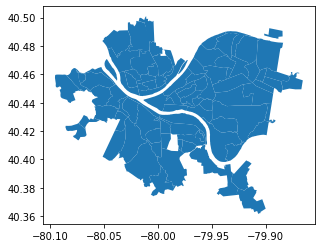

In [7]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
neighborhoods.plot() 

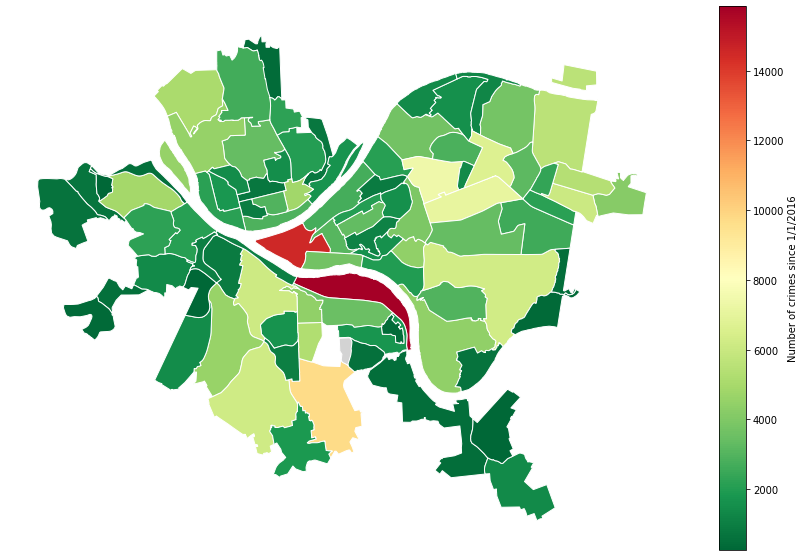

In [8]:

crime_map = neighborhoods.merge(crimedata, how = 'left',left_on = 'hood',right_index = True)
crime_map = crime_map.plot(column = 'Neighborhood', cmap = 'RdYlGn_r', edgecolor = 'white', legend = True, 
               legend_kwds = {'label': "Number of crimes since 1/1/2016"}, figsize = (15,10),
                missing_kwds={"color": "lightgrey"},)
crime_map.set_axis_off()
#crime_map.explore()


#how to make map interactive like on the geopandas documentation?




